In [17]:
import matplotlib
import numpy as np
import pandas as pd
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from pathlib import Path
import math


def readlog(line):
    result = {}
    words = line.split()
    for index in range(len(words)):
        if index > 0 and index < len(words):
            if words[index] == "=":
                result[words[index - 1]] = words[index + 1]
    return result

def readlogs(filename):
    codeWord = "run ="
    with open(filename, 'r') as data:
        lines = data.readlines()
        for line in lines:
            if codeWord in line:
                yield readlog(line)

filename = "res.txt"
df = pd.DataFrame(readlogs(filename)).astype(
    {
        "N": int,
        "NP": int,
        "Time": float,
        "run": int,
    }
)

df

,run,N,NP,Time
0,1,10,1,0.000016
1,2,10,1,0.000018
2,3,10,1,0.000030
3,4,10,1,0.000017
4,5,10,1,0.000021
...,...,...,...,...
891,4,1000,16,0.043800
892,5,1000,16,0.143579
893,6,1000,16,0.267480
894,7,1000,16,0.352274


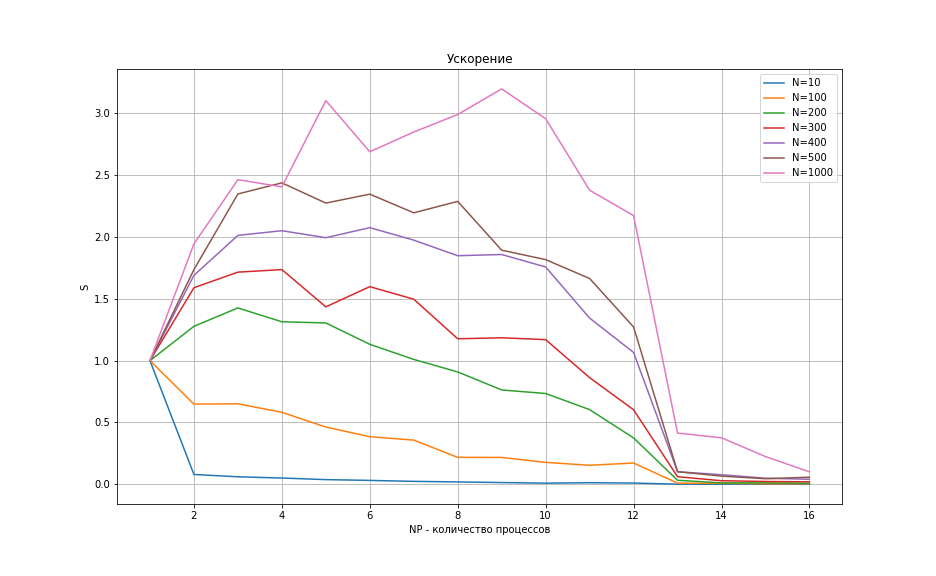

In [18]:
%matplotlib inline
%matplotlib widget
plt.figure(figsize=[10, 8])
plt.title(f"Ускорение")
plt.xlabel("NP - количество процессов")
plt.ylabel("S")

for N, df1 in df.groupby("N"):
    dfmean = df1.groupby("NP").mean("Time").sort_values("NP").reset_index()
    # print(dfmean[dfmean["NP"] == 1]["Time"])
    plt.plot(dfmean["NP"], dfmean[dfmean["NP"] == 1]["Time"][0] / dfmean["Time"],
             label=f"N={N}")
        # plt.plot(dfmin["mpdus"], dfmin["throughput"], label=f"multilink min, {width1}, {width2}")
        # plt.plot(dfmean["mpdus"], dfmean["throughput"], label=f"multilink mean, {width1}, {width2}")

        # # plt.plot(dfmean["mpdus"], dfmean["throughput"], label=f"multilink mean, {width1}, {width2}")
        # plt.plot(dfOneLink1["mpdus"], dfOneLink1["throughput"], label=f"baseline, {width1}, {width2}")

plt.grid()
plt.legend()
# plt.tight_layout()
# plt.ylim(0)
plt.show()

plt.savefig(f"plot.jpg")